In [1]:
from __future__ import division
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
sns.set_style('darkgrid') #if the seaborn/sns thing doesn't work, just leave it out.

In [2]:
x = np.linspace(0,4*np.pi,1000) # get an array of 1000 evenly spaced points

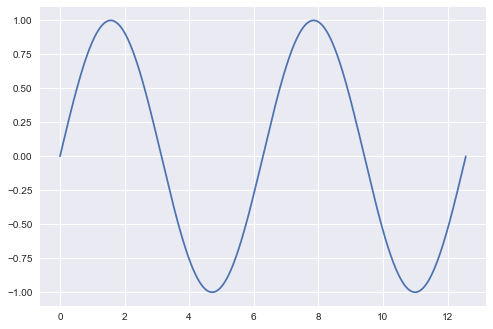

In [3]:
plt.plot(x,np.sin(x)) # make sure to use the functions from numpy
# e.g "np.sin" to work nicely with arrays

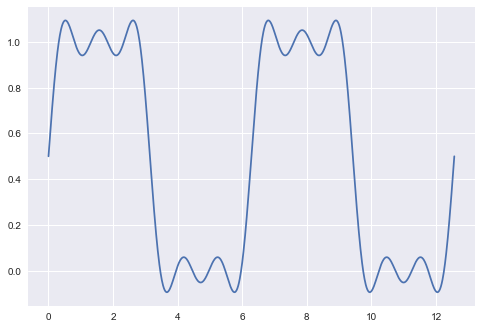

In [4]:
y = 0.5 + (np.sin(x) + np.sin(3*x)/3 + np.sin(5*x)/5)*2/np.pi
plt.plot(x,y)

In [5]:
# slightly fancier:
def plotseries(n=1):
    # go all the way up to n, 
    # which is n+1 in a half-open interval like Python uses.
    x = np.linspace(0,4*np.pi,1000)
    y = np.zeros_like(x) # start with y = 0, as an array.
    for i in range(0,n+1):
        if i == 0:
            y = y + 1/2
        elif i % 2 == 0: # evens, they may not know div/mod
            y = y + 0
        else: # odds
            y = y + (2/np.pi) * np.sin(i*x)/i
    plt.plot(x,y)

In [6]:
from ipywidgets import interact, fixed

<function __main__.plotseries>

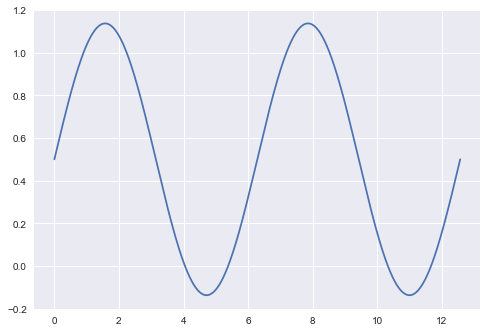

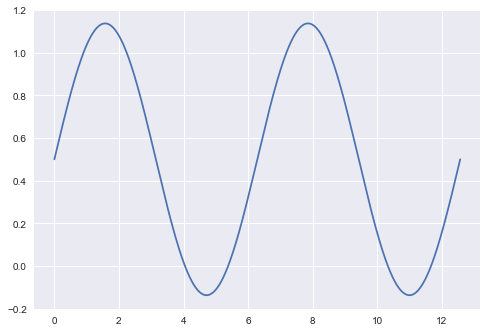

In [7]:
interact(plotseries,n=(1,100))

In [16]:
plotseries(7)

TypeError: plotseries() missing 2 required positional arguments: 'k' and 'flag'

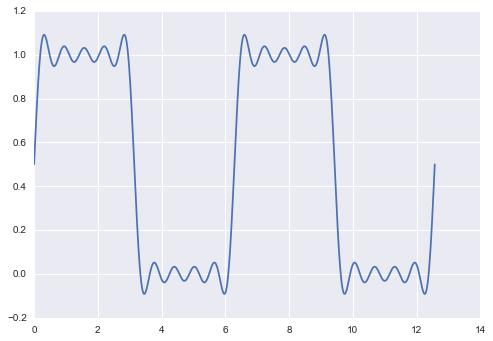

In [7]:
plotseries(10)

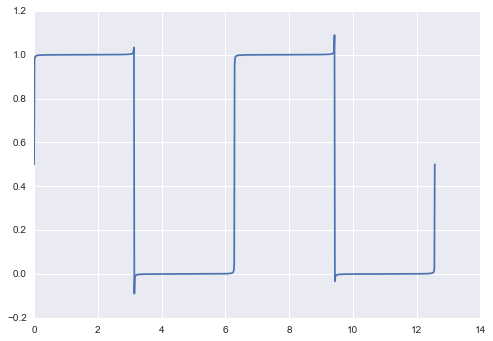

In [8]:
plotseries(1000) # I'M BATMAN!

In [13]:
def plotseries(n=1):
    # go all the way up to n, 
    # which is n+1 in a half-open interval like Python uses.
    x = np.linspace(0,4*np.pi,1000)
    y = np.zeros_like(x) # start with y = 0, as an array.
    for i in range(0,n+1):
        if i == 0:
            y = y + 0.5
        #elif i == 1:
        #    y = y + (1/2)*np.sin(x)
        if i % 2 == 0: # evens, they may not know div/mod
            #y = y + (2/np.pi) * (np.cos(i*x)/(i**2 - 1))
            pass
        else: # odds
            y = y + (4/(np.pi*np.pi*i*i))*np.cos(i*x)
    plt.plot(x,y)

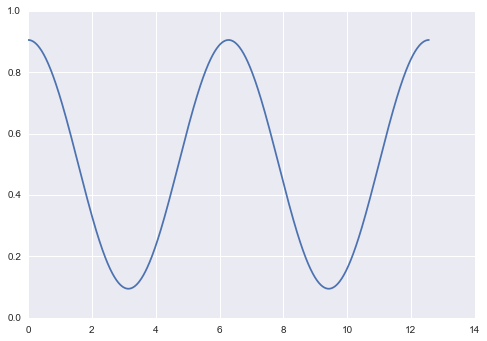

In [14]:
interact(plotseries,n=(1,30))

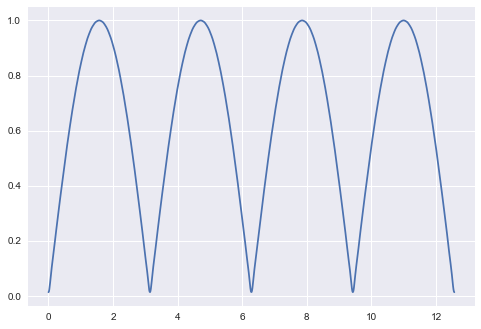

In [15]:
def plotseries(n=2):
    # go all the way up to n, 
    # which is n+1 in a half-open interval like Python uses.
    x = np.linspace(0,4*np.pi,1000)
    y = np.zeros_like(x) # start with y = 0, as an array.
    for i in range(1,n+1):
        if i == 0:
            y = y
        if i % 2 == 0: # evens, they may not know div/mod
            y = y - (2/(i**2-1))*np.cos(i*x)
        else: # odds
            y = y #- (1/i**2)*np.cos(i*x)
    y = 2/np.pi + (2/np.pi)*y
    plt.plot(x,y)
interact(plotseries,n=(2,50))

In [9]:
def plotseries(n,d,flag):
    # go all the way up to n,
    # which is n+1 in a half-open interval like Python uses.
    #First set up the forcing function
    Fo=8
    w1 = 9
    T = 2*np.pi/w1

    #set up the graph - in particular, make t axis accomodate several cycles
    t = np.linspace(0,3*T,1000)
    y = np.zeros_like(t) # start with y = 0, as an array.

    #now set parameters of the system being forced
    m=0.6
    # d is set in the parameters
    for i in range(0,n+1):
        if flag==1: #If fn 0, don’t convert to response; show the forcing function
            Ci = 1
            phi=0
        else:
            wi=i*w1
            denom=np.sqrt((d*wi)*(d*wi)+(m*wi*wi)*(m*wi*wi))
            if i==0:
                Ci=1/d
                phi=0
            else:
                Ci = 1/denom  #This multiples the i-th forcing term to get response
                phi = -np.arctan(d/m*wi)
        if i == 0:
            y = 1/4*Ci
        else:
            y = y + np.sin(i*np.pi/2)/(np.pi*i)*np.cos(i*w1*t+phi)*Ci
            y = y + (1-np.cos(i*np.pi/2))/(np.pi*i)*np.sin(i*w1*t+phi)*Ci

    plt.subplot(3,1,flag)
    plt.plot(t,Fo*y)


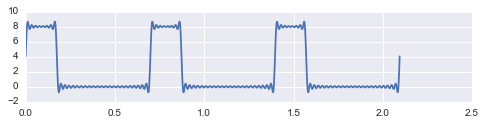

In [10]:
terms = 30;
plotseries(terms,10,1)

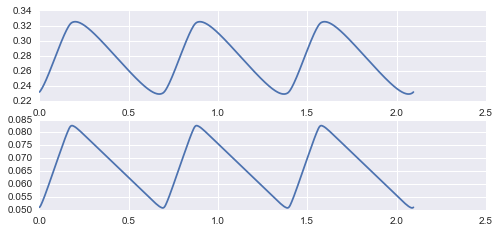

In [11]:
plotseries(terms,7.2,2)
plotseries(terms,30,3)


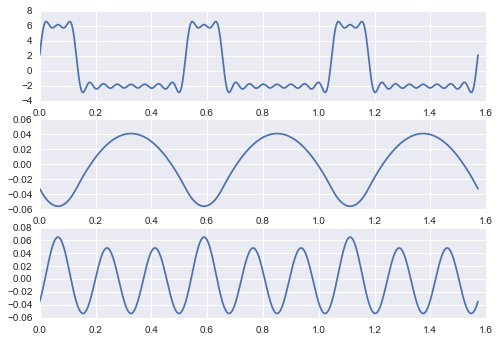

In [12]:
# Mass on spring
def plotseries(n,k,flag):
    # go all the way up to n,
    # which is n+1 in a half-open interval like Python uses.
    #First set up the forcing function
    Fo=8
    w1 = 12
    T = 2*np.pi/w1

    #set up the graph - in particular, make t axis accomodate several cycles
    t = np.linspace(0,3*T,1000)
    y = np.zeros_like(x) # start with y = 0, as an array.

    #now set parameters of the system being forced
    m=0.6
    # k is set in the parameters
    for i in range(0,n+1):
        if flag==1: #If fn 0, don’t convert to response; show the forcing function
            Ci = 1
        else:
            Ci = (1/(k-m*i*i*w1*w1))  #This multiples the i-th forcing term to get response
        if i == 0:
            term = 1/4*Ci
        else:
            y = y + np.sin(i*np.pi/2)/(np.pi*i)*np.cos(i*w1*t)*Ci
            y = y + (1-np.cos(i*np.pi/2))/(np.pi*i)*np.sin(i*w1*t)*Ci
    plt.subplot(3,1,flag)
    plt.plot(t,Fo*y)

terms = 10;
plotseries(terms,10,1) #second parameter is k; m is set at 0.6
plotseries(terms,10,2)
plotseries(terms,800,3)

#plt.subplot(2,1,2)

#plotseries(10,0)

#plotseries(100,0) # I’M BATMAN!
